In [1]:
#Import Libraries
#Linear Algrebra
import numpy as np
#Data Processing
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import math

In [3]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#Describing all numerical features
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Describing all categorical features
data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


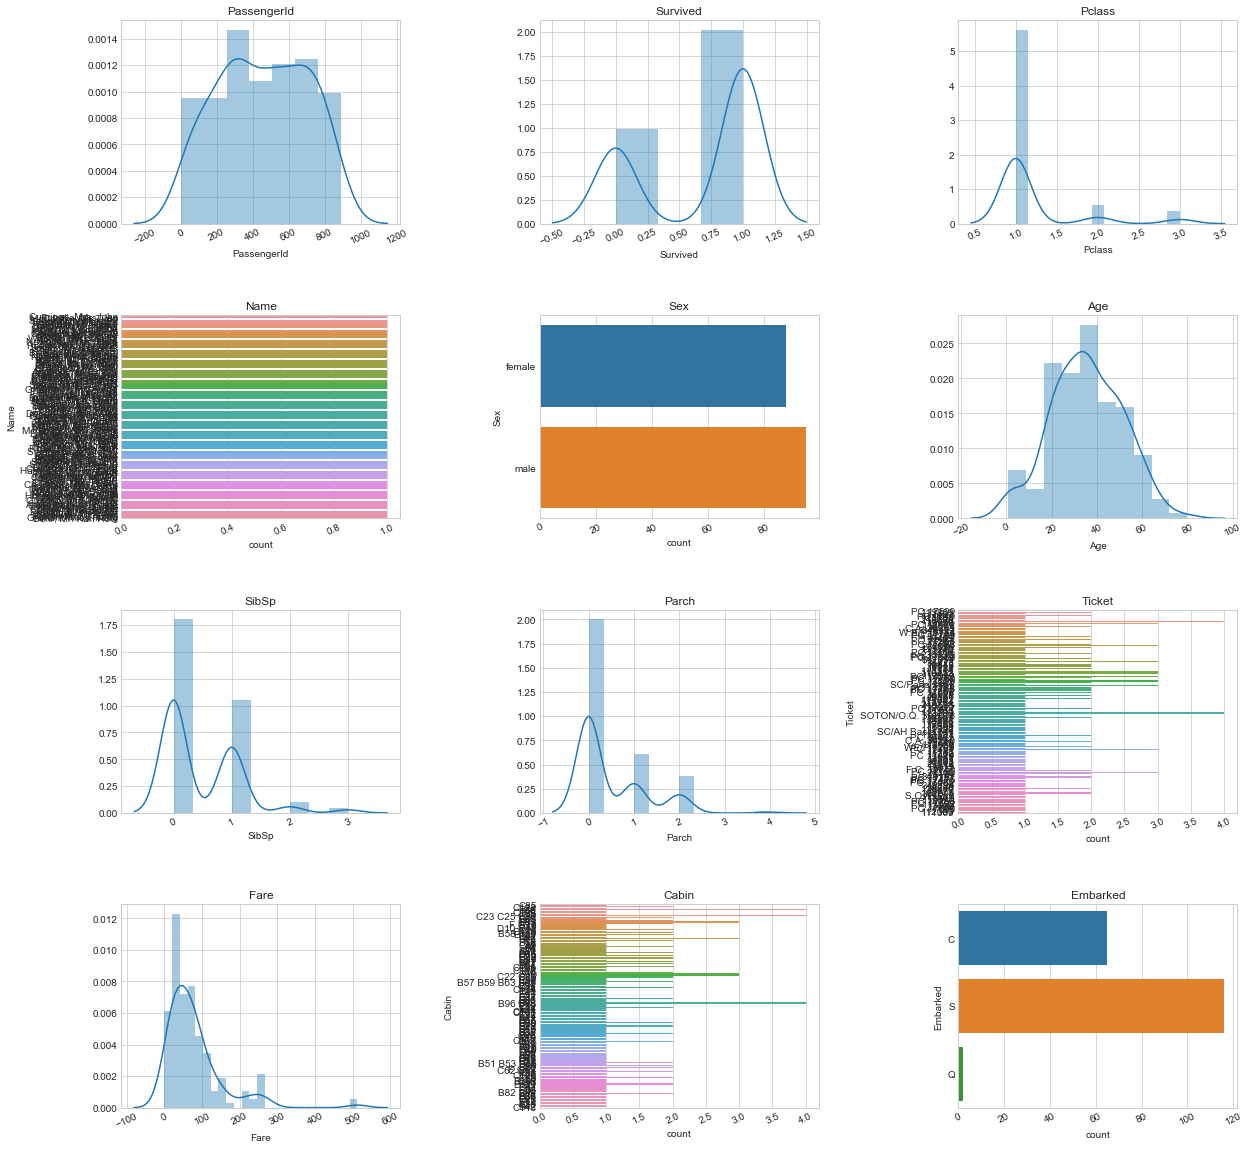

In [8]:
#Plotting distribution of each feature
dataset = data.dropna()
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left = None, right = None, bottom = None, top = None, wspace = 0.5, hspace = 0.45 )
rows = math.ceil(float(dataset.shape[1])/3)
for i,column in enumerate(dataset.columns):
    ax = fig.add_subplot(rows,3,i+1)
    ax.set_title(column)
    if dataset.dtypes[column] == np.object:
        g = sns.countplot(y = column, data = dataset)
        substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
        g.set(yticklabels = substrings)
        plt.xticks(rotation = 25)
    else:
        g = sns.distplot(dataset[column])
        plt.xticks(rotation = 25)
    

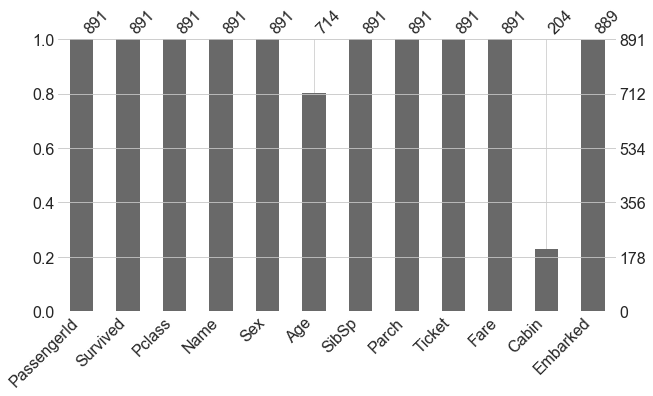

In [9]:
#How many missing values are there in our dataset?

missingno.bar(data, sort = 'ascending', figsize = (10,5))

In [10]:
#Number of null values in each column
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
#We will drop the whole Cabin column from datest because it contains too many null values that it will hamper our predictions
#even if we impute it with some variables.

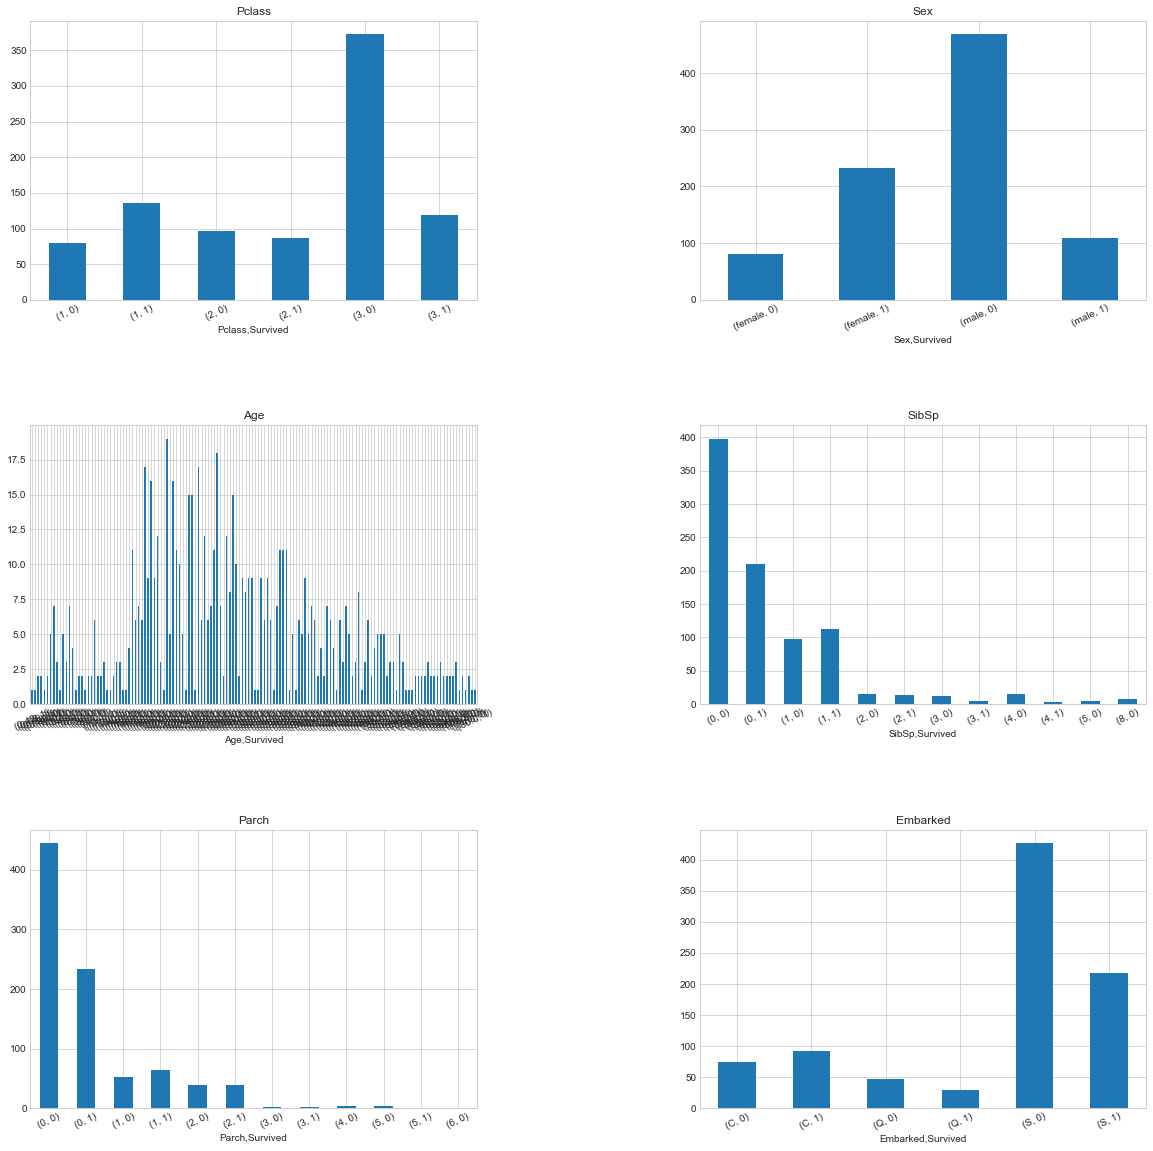

In [12]:
#Relationship between variables and survived.
l=['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Embarked']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.45)
rows = math.ceil(float(len(l)) / 2)
for i, column in enumerate(l):
    ax = fig.add_subplot(rows, 2, i + 1)
    ax.set_title(column)
    data.groupby([column,'Survived'])["Sex"].count().plot.bar()
    plt.xticks(rotation=25)

# Feature Engineering

In [13]:
features=data.drop(["Survived","Name","PassengerId","Ticket","Cabin"],axis=1)
features_test=data_test.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)
labels=data['Survived']

In [14]:
print(features_test.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


# Handling Missing Values 

In [15]:
#Age
features['Age'].fillna(features['Age'].median(), inplace = True)
features_test['Age'].fillna(features_test['Age'].median(), inplace = True)

In [16]:
#Embarked
#As Embarked is a categorical variable we will impute it with same value called "Unknown"

features['Embarked'].fillna('Unknown', inplace = True)

In [17]:
#Fare
features_test['Fare'].fillna(features_test['Fare'].median(), inplace = True)


# Handling Categorical Data

In [18]:
#Features
X = pd.get_dummies(features, columns = ['Sex', 'Embarked'], drop_first = True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unknown
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0
4,3,35.0,0,0,8.0500,1,0,1,0


In [19]:
#Features_test
X_test = pd.get_dummies(features_test, columns = ['Sex', 'Embarked'], drop_first = True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [20]:
#As in test feature there is no column with the name Embarked_Unknown so we will create one with all its values as zero

create = []
for i in range(0,418):
    create.append(0)
X_test['Embarked_Unknown'] = create
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unknown
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,0


# Feature Scaling

In [21]:
#Standardizing the train and test features.
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler()
X = standardized_data.fit_transform(X)
X_test = standardized_data.fit_transform(X_test)

c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Building The Model

In [22]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state = 0)
classifier.fit(X, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting The Results

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
test = pd.read_csv('gender_submission.csv')
y_test = test['Survived']

# Evaluating The Results

In [25]:
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[241,  25],
       [ 39, 113]], dtype=int64)

In [26]:
print("Number of False Positives is: ",cm[1][0])

Number of False Positives is:  39


In [27]:
print("Number of False Negatives is:",cm[0][1])

Number of False Negatives is: 25


In [28]:
print("Number of True Positives is:",cm[1][1])

Number of True Positives is: 113


In [29]:
print("Number of True Negatives is:",cm[0][0])

Number of True Negatives is: 241


In [30]:
#Checking the accuracy of the Model

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.84688995215311

In [31]:
from sklearn.metrics import precision_score
print("Precision Score is:",precision_score(y_test,y_pred))

Precision Score is: 0.8188405797101449


In [32]:
from sklearn.metrics import recall_score
print("Recall Score is:",recall_score(y_test, y_pred))

Recall Score is: 0.743421052631579


In [33]:
from sklearn.metrics import f1_score
print("F1 Score is:",f1_score(y_test,y_pred))

F1 Score is: 0.7793103448275863
